# Analyzing Google Trends: An Essential Tool for Marketing

#### Team 8 : **Anusha Ronaki, Raj Patel, Rohan Chaudhary, Syeda Ghazal Qadri, Xin Su**

### Objective

Our goal is to understand how Google Trends, a highly valuable tool for SEO and content marketing, is used in the sports marketing space. We will benchmark on a challenging large-scale google trends datasets and analyze the data to identify key functions (trending terms, rank, score) and understand the roles between sports teams and sponsors in marketing play in interpreting this data for content based targeting.

Source: Google Trends BigQuery Dataset by Google     

### Executive Summary

"Explore what the world is searching"
              
In this notebook, we take you through Google Trends, A great tool for marketing that visualizes trending topics, search terms, and news on Google. It provides real-time data regarding current trends from the past seven days, as well as past trends.
             
With the data available in Google Trends, marketing specialists can easily extract insights about where, when, how, and how long people search for terms related to a product, service, or business and can certainly leverage Google Trends data for business goals.

We also touch upon Sports sponsorship considering most trending terms are sports-centric and take you through how big brands allocate their marketing spend on soccer and football in specific clubs to gain brand recall. We have developed some visualizations to evaluate if sponsorship activities actually have ROI for sponsors beyond advertising equivalency.

### Introduction & Motivation
Google Trends is a powerful keyword trend research website that provides insights into top search queries and their evolution across various countries and regions over time. In the following notebook, we have highlighted key terms of the trends dataset and have specified our focus on Sports Marketing to gather an understanding of how certain terms (such as team names, competitions) vary in different regions in the US and globally.

### Table of Contents

### 1. Data Overview

### 1 a. Dataset Tables

### List of countries and region names
##### The trending terms data is available for 41 different countries in the world 

In [19]:
%%bigquery
SELECT DISTINCT country_name, region_name
FROM bigquery-public-data.google_trends.international_top_terms
order by country_name

Downloading: 100%|██████████| 968/968 [00:01<00:00, 672.26rows/s]


country_name                      region_name
0      Argentina  Autonomous City of Buenos Aires
1      Argentina                          Tucumán
2      Argentina        Tierra del Fuego Province
3      Argentina                          Cordoba
4      Argentina                            Jujuy
..           ...                              ...
963      Vietnam              Quảng Ninh Province
964      Vietnam               Quảng Trị Province
965      Vietnam                 Long An Province
966      Vietnam                      Thai Nguyen
967      Vietnam                        Hau Giang

[968 rows x 2 columns]

### List of states in the United States chosen in the dataset

In [21]:
%%bigquery
Select distinct(right (dma_name,2)) as state
From bigquery-public-data.google_trends.top_terms
Order by state
Limit 5

Downloading: 100%|██████████| 5/5 [00:01<00:00,  4.26rows/s]


state
0    AK
1    AL
2    AR
3    AZ
4    CA

### Google trends dataset consists of 4 tables as decribed below

### A summary of the categories in the dataset for the international_top_rising_terms table which contains data for rising international terms

In [16]:
%%bigquery
SELECT * FROM `bigquery-public-data.google_trends.international_top_rising_terms`
limit 5;

Downloading: 100%|██████████| 5/5 [00:01<00:00,  4.61rows/s]


term        week  score refresh_date country_code region_name  rank  \
0  afl  2017-09-10     31   2022-09-03           NZ    Auckland    11   
1  afl  2017-09-24     96   2022-09-03           NZ    Auckland    11   
2  afl  2017-10-01     18   2022-09-03           NZ    Auckland    11   
3  afl  2017-10-22      6   2022-09-03           NZ    Auckland    11   
4  afl  2018-01-21      7   2022-09-03           NZ    Auckland    11   

   percent_gain country_name region_code  
0           190  New Zealand      NZ-AUK  
1           190  New Zealand      NZ-AUK  
2           190  New Zealand      NZ-AUK  
3           190  New Zealand      NZ-AUK  
4           190  New Zealand      NZ-AUK

### A summary of the categories in the dataset for the international_top_terms table which contains data for top international terms

In [5]:
%%bigquery
SELECT * FROM `bigquery-public-data.google_trends.international_top_terms`
limit 5;

Downloading: 100%|██████████| 5/5 [00:01<00:00,  4.35rows/s]


region_name region_code  term        week  score    country_name  \
0     England      GB-ENG  9/11  2017-09-24      3  United Kingdom   
1     England      GB-ENG  9/11  2017-10-01      3  United Kingdom   
2     England      GB-ENG  9/11  2017-10-22      3  United Kingdom   
3     England      GB-ENG  9/11  2017-11-19      3  United Kingdom   
4     England      GB-ENG  9/11  2018-01-07      3  United Kingdom   

  country_code  rank refresh_date  
0           GB    15   2022-09-13  
1           GB    15   2022-09-13  
2           GB    15   2022-09-13  
3           GB    15   2022-09-13  
4           GB    15   2022-09-13

### A summary of the categories in the dataset for the top_rising_terms table which contains data for the U.S. top rising terms

In [7]:
%%bigquery
SELECT * FROM `bigquery-public-data.google_trends.top_rising_terms`
limit 5;

Downloading: 100%|██████████| 5/5 [00:01<00:00,  4.29rows/s]


score  rank  percent_gain refresh_date            dma_name  dma_id  \
0    NaN     1          4750   2022-09-03  Portland-Auburn ME     500   
1    NaN     1          4750   2022-09-03  Portland-Auburn ME     500   
2    NaN     1          4750   2022-09-03  Portland-Auburn ME     500   
3    NaN     1          4750   2022-09-03  Portland-Auburn ME     500   
4    NaN     1          4750   2022-09-03  Portland-Auburn ME     500   

                      term        week  
0  ตรวจ หวย 1 กันยายน 2565  2017-09-10  
1  ตรวจ หวย 1 กันยายน 2565  2017-09-17  
2  ตรวจ หวย 1 กันยายน 2565  2017-09-24  
3  ตรวจ หวย 1 กันยายน 2565  2017-10-01  
4  ตรวจ หวย 1 กันยายน 2565  2017-10-08

### A summary of the categories in the dataset for the top_terms table which contains data for the U.S. top terms

In [7]:
%%bigquery
SELECT * FROM `bigquery-public-data.google_trends.top_terms`
limit 5;

Downloading: 100%|██████████| 5/5 [00:01<00:00,  3.92rows/s]


week  score  rank refresh_date            dma_name  dma_id   term
0  2017-10-08    8.0     1   2022-10-04  Portland-Auburn ME     500  49ers
1  2017-10-15    NaN     1   2022-10-04  Portland-Auburn ME     500  49ers
2  2017-10-22    8.0     1   2022-10-04  Portland-Auburn ME     500  49ers
3  2017-10-29   18.0     1   2022-10-04  Portland-Auburn ME     500  49ers
4  2017-11-05   15.0     1   2022-10-04  Portland-Auburn ME     500  49ers

### 1 b. Column Descriptions 


### 1 c. Percentage Gain for International Top Rising Terms

The percent gain gives a rate at which a term was rising in terms of popularity as compared to the previous date period for which data was available

In [48]:
%%bigquery
SELECT distinct(term), Round(avg(rank),0) as rank, country_name, percent_gain
FROM `bigquery-public-data.google_trends.international_top_rising_terms`
group by term, country_name, percent_gain
order by percent_gain desc;

Downloading: 100%|██████████| 30485/30485 [00:01<00:00, 25671.58rows/s]


term  rank  country_name  percent_gain
0                    apuração   1.0      Portugal         25800
1                    apuração   1.0        Poland         25800
2                    apuração   1.0         Italy         25800
3                    apuração   1.0  Saudi Arabia         25800
4                    apuração   1.0         Japan         25800
...                       ...   ...           ...           ...
30480  first day of fall 2022  25.0      Malaysia            40
30481              adnan syed  25.0      Portugal            40
30482              adnan syed  25.0        Turkey            40
30483              adnan syed  25.0     Australia            40
30484              adnan syed  25.0      Malaysia            40

[30485 rows x 4 columns]

### 1 c. Percentage Gain for the U.S. Top Rising Terms

In [52]:
%%bigquery
SELECT distinct(term), Round(avg(rank),0) as rank, percent_gain
FROM `bigquery-public-data.google_trends.top_rising_terms`
group by term, percent_gain
order by percent_gain desc;

Downloading: 100%|██████████| 758/758 [00:01<00:00, 602.35rows/s]


term  rank  percent_gain
0                            apuração   1.0         25800
1    election results #brelection2022   2.0         22450
2                              coolio   1.0         22400
3              apuração eleições 2022   3.0         21600
4             resultado eleições 2022   4.0         13050
..                                ...   ...           ...
753                          e devlet  19.0            40
754                          cricbuzz  23.0            40
755                          flipkart  24.0            40
756                 pendataan non asn  14.0            40
757                       brasileirao  16.0            40

[758 rows x 3 columns]

### 2. Top Terms

### 2 a. Top Trending Searches (Global)

### What are the top 25 rising google searches or terms in the world for the latest date available? 

In [38]:
%%bigquery
SELECT
  term,country_name,
  ARRAY_AGG(STRUCT(rank,week) ORDER BY week DESC LIMIT 1) Rank_per_week
FROM 
    `bigquery-public-data.google_trends.international_top_rising_terms`
WHERE
    refresh_date = 
        (SELECT
            MAX(refresh_date)
        FROM
        `bigquery-public-data.google_trends.international_top_rising_terms`  
        )
GROUP BY    
    term, country_name
ORDER BY
    (SELECT rank FROM UNNEST(Rank_per_week))

Downloading: 100%|██████████| 1025/1025 [00:01<00:00, 622.91rows/s]


term country_name                       Rank_per_week
0     billur kalkavan  South Korea   [{'rank': 1, 'week': 2022-10-09}]
1     billur kalkavan      Denmark   [{'rank': 1, 'week': 2022-10-09}]
2     billur kalkavan      Nigeria   [{'rank': 1, 'week': 2022-10-09}]
3     billur kalkavan       Canada   [{'rank': 1, 'week': 2022-10-09}]
4     billur kalkavan    Indonesia   [{'rank': 1, 'week': 2022-10-09}]
...               ...          ...                                 ...
1020      corinthians  Philippines  [{'rank': 25, 'week': 2022-10-09}]
1021      corinthians      Vietnam  [{'rank': 25, 'week': 2022-10-09}]
1022      corinthians       Turkey  [{'rank': 25, 'week': 2022-10-09}]
1023      corinthians     Thailand  [{'rank': 25, 'week': 2022-10-09}]
1024      corinthians      Austria  [{'rank': 25, 'week': 2022-10-09}]

[1025 rows x 3 columns]

### What are the top 25 terms searched on google in the world for the latest date available? 

In [39]:
%%bigquery
SELECT
  term,country_name,
  ARRAY_AGG(STRUCT(rank,week) ORDER BY week DESC LIMIT 1) Rank_per_week
FROM 
    `bigquery-public-data.google_trends.international_top_terms`
WHERE
    refresh_date = 
        (SELECT
            MAX(refresh_date)
        FROM
        `bigquery-public-data.google_trends.international_top_terms`  
        )
GROUP BY    
    term, country_name
ORDER BY
    (SELECT rank FROM UNNEST(Rank_per_week))

Downloading: 100%|██████████| 1021/1021 [00:01<00:00, 629.69rows/s]


term country_name  \
0          ليفربول ضد مان سيتي        Egypt   
1     Real Madrid vs Barcelona       Mexico   
2       Liverpool mot Man City       Norway   
3        Liverpool vs Man City      Nigeria   
4     Real Madrid vs Barcelona     Colombia   
...                        ...          ...   
1016    Palmeiras vs São Paulo        Chile   
1017       Celta–real SOCIEDAD      Hungary   
1018          Уайлдер Хелениус      Ukraine   
1019                     Milan     Colombia   
1020               Jack Miller    Australia   

                           Rank_per_week  
0      [{'rank': 1, 'week': 2022-10-09}]  
1      [{'rank': 1, 'week': 2022-10-09}]  
2      [{'rank': 1, 'week': 2022-10-09}]  
3      [{'rank': 1, 'week': 2022-10-09}]  
4      [{'rank': 1, 'week': 2022-10-09}]  
...                                  ...  
1016  [{'rank': 25, 'week': 2022-10-09}]  
1017  [{'rank': 25, 'week': 2022-10-09}]  
1018  [{'rank': 25, 'week': 2022-10-09}]  
1019  [{'rank': 25, 'week': 2022-10-09}]  
1020  [{'rank': 25, 'week': 2022-10-09}]  

[1021 rows x 3 columns]

### 2 b.Top Trending Searches (the U.S.)

### What are the top 25 rising google searches or terms in the United States for the latest date available?

In [41]:
%%bigquery
SELECT
  term,dma_name,
  ARRAY_AGG(STRUCT(rank,week) ORDER BY week DESC LIMIT 1) Rank_per_week
FROM 
    `bigquery-public-data.google_trends.top_rising_terms`
WHERE
    refresh_date = 
        (SELECT
            MAX(refresh_date)
        FROM
        `bigquery-public-data.google_trends.top_rising_terms`  
        )
GROUP BY    
    term, dma_name
ORDER BY
    (SELECT rank FROM UNNEST(Rank_per_week))
Limit 25;

Downloading: 100%|██████████| 25/25 [00:01<00:00, 19.88rows/s]


term                            dma_name  \
0   billur kalkavan                        Marquette MI   
1   billur kalkavan  Orlando-Daytona Beach-Melbourne FL   
2   billur kalkavan                      Panama City FL   
3   billur kalkavan                     Palm Springs CA   
4   billur kalkavan           Little Rock-Pine Bluff AR   
5   billur kalkavan               Wausau-Rhinelander WI   
6   billur kalkavan                        Ft. Wayne IN   
7   billur kalkavan  Johnstown-Altoona-State College PA   
8   billur kalkavan                    Oklahoma City OK   
9   billur kalkavan  Yakima-Pasco-Richland-Kennewick WA   
10  billur kalkavan                        Knoxville TN   
11  billur kalkavan                 Montgomery-Selma AL   
12  billur kalkavan                       Binghamton NY   
13  billur kalkavan             Boston MA-Manchester NH   
14  billur kalkavan                        Fairbanks AK   
15  billur kalkavan           Providence-New Bedford MA   
16  billur kalkavan                           Juneau AK   
17  billur kalkavan                           Dothan AL   
18  billur kalkavan   Greenville-New Bern-Washington NC   
19  billur kalkavan                  Portland-Auburn ME   
20  billur kalkavan                          Spokane WA   
21  billur kalkavan             La Crosse-Eau Claire WI   
22  billur kalkavan                 Ft. Myers-Naples FL   
23  billur kalkavan                        Baltimore MD   
24  billur kalkavan                      Chattanooga TN   

                        Rank_per_week  
0   [{'rank': 1, 'week': 2022-10-09}]  
1   [{'rank': 1, 'week': 2022-10-09}]  
2   [{'rank': 1, 'week': 2022-10-09}]  
3   [{'rank': 1, 'week': 2022-10-09}]  
4   [{'rank': 1, 'week': 2022-10-09}]  
5   [{'rank': 1, 'week': 2022-10-09}]  
6   [{'rank': 1, 'week': 2022-10-09}]  
7   [{'rank': 1, 'week': 2022-10-09}]  
8   [{'rank': 1, 'week': 2022-10-09}]  
9   [{'rank': 1, 'week': 2022-10-09}]  
10  [{'rank': 1, 'week': 2022-10-09}]  
11  [{'rank': 1, 'week': 2022-10-09}]  
12  [{'rank': 1, 'week': 2022-10-09}]  
13  [{'rank': 1, 'week': 2022-10-09}]  
14  [{'rank': 1, 'week': 2022-10-09}]  
15  [{'rank': 1, 'week': 2022-10-09}]  
16  [{'rank': 1, 'week': 2022-10-09}]  
17  [{'rank': 1, 'week': 2022-10-09}]  
18  [{'rank': 1, 'week': 2022-10-09}]  
19  [{'rank': 1, 'week': 2022-10-09}]  
20  [{'rank': 1, 'week': 2022-10-09}]  
21  [{'rank': 1, 'week': 2022-10-09}]  
22  [{'rank': 1, 'week': 2022-10-09}]  
23  [{'rank': 1, 'week': 2022-10-09}]  
24  [{'rank': 1, 'week': 2022-10-09}]

### What are the top 25 google searches or terms in the United States for the latest date available?

In [43]:
%%bigquery
SELECT
  term,
  ARRAY_AGG(STRUCT(rank,week) ORDER BY week DESC LIMIT 1) Rank_per_week
FROM 
    `bigquery-public-data.google_trends.top_terms`
WHERE
    refresh_date = 
        (SELECT
            MAX(refresh_date)
        FROM
        `bigquery-public-data.google_trends.top_terms`  
        )
GROUP BY    
    term
ORDER BY
    (SELECT rank FROM UNNEST(Rank_per_week))
LIMIT 15

Downloading: 100%|██████████| 15/15 [00:01<00:00, 10.59rows/s]


term                       Rank_per_week
0                    Chiefs   [{'rank': 1, 'week': 2022-10-09}]
1         Cowboys vs Eagles   [{'rank': 2, 'week': 2022-10-09}]
2                    Giants   [{'rank': 3, 'week': 2022-10-09}]
3                   Bengals   [{'rank': 4, 'week': 2022-10-09}]
4            Robby Anderson   [{'rank': 5, 'week': 2022-10-09}]
5                 Amouranth   [{'rank': 6, 'week': 2022-10-09}]
6    Buccaneers vs Steelers   [{'rank': 7, 'week': 2022-10-09}]
7                     Colts   [{'rank': 8, 'week': 2022-10-09}]
8    Aston Villa vs Chelsea   [{'rank': 9, 'week': 2022-10-09}]
9              Selena Gomez  [{'rank': 10, 'week': 2022-10-09}]
10  Man United vs Newcastle  [{'rank': 11, 'week': 2022-10-09}]
11                      PSG  [{'rank': 12, 'week': 2022-10-09}]
12         49ers vs Falcons  [{'rank': 13, 'week': 2022-10-09}]
13            Bubba Wallace  [{'rank': 14, 'week': 2022-10-09}]
14       Patriots vs Browns  [{'rank': 15, 'week': 2022-10-09}]

### 2 c. What are the top common terms searched in the US and the rest of the countries?

#### A summary of the top terms in both foreign countries and the United States.

In [17]:
%%bigquery
Select * from(
(SELECT term, rank as rank_us
FROM `bigquery-public-data.google_trends.top_terms`
WHERE
    refresh_date = DATE_SUB(CURRENT_DATE(), INTERVAL 1 DAY)
group by 1, 2
order by rank_us) as a
JOIN
(SELECT term, rank as rank_world
FROM `bigquery-public-data.google_trends.international_top_terms`
WHERE
    refresh_date = DATE_SUB(CURRENT_DATE(), INTERVAL 1 DAY)
group by 1, 2
order by rank_world) as b
using(term))
limit 5;

Downloading: 100%|██████████| 5/5 [00:01<00:00,  4.14rows/s]


term  rank_us  rank_world
0  Amouranth        6          17
1  Amouranth        6          18
2  Amouranth        6           4
3  Amouranth        6          15
4  Amouranth        6          24

##### Some of the common terms are : Amouranth, Aston Villa vs Chelsea, Selena Gomez, Man United vs Newcastle,PSG, Sylvester Stallone

### 3. Comparison of Top terms between the International data and the U.S. data

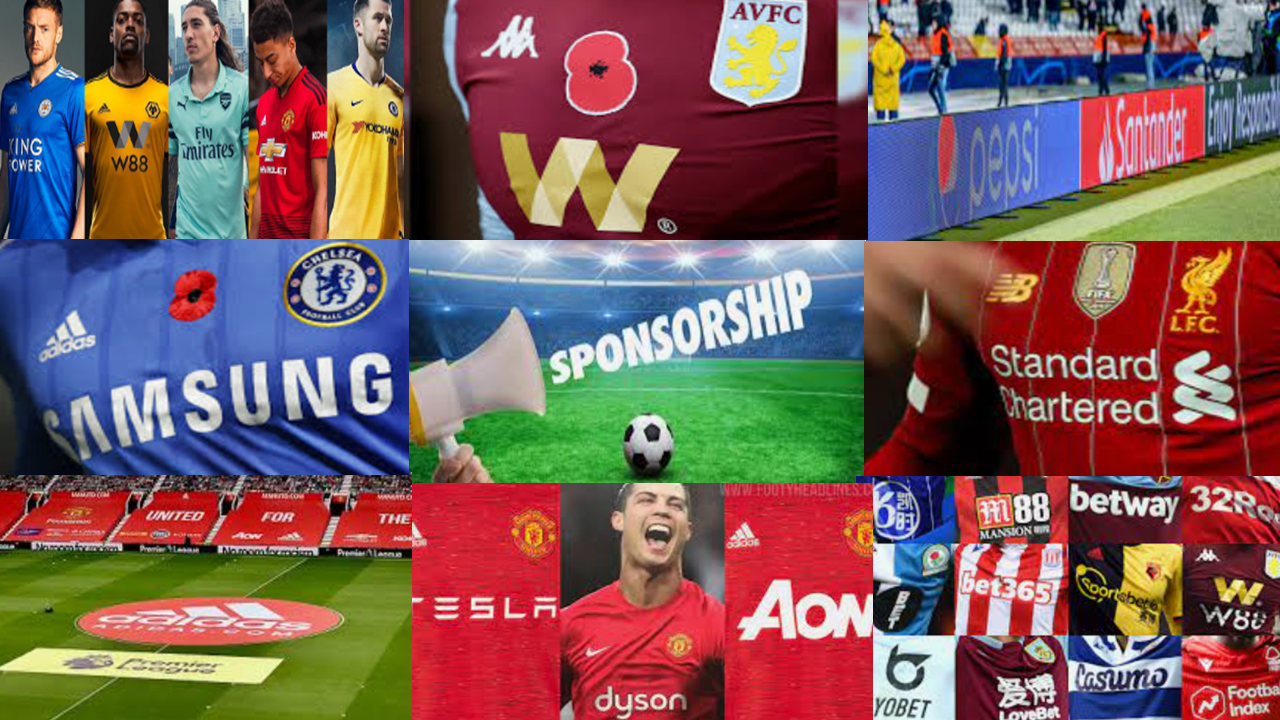

### 3 a. International popularity of the term: Aston Villa vs Chelsea

In [34]:
%%bigquery
SELECT term, Round(avg(score),0) as score, Round(avg(rank),0) as rank, week, country_name
FROM `bigquery-public-data.google_trends.international_top_terms`
where term LIKE 'Aston Villa vs Chelsea' and score IS NOT NULL
group by week, term, country_name
order by week, score desc;

Downloading: 100%|██████████| 1417/1417 [00:01<00:00, 1135.18rows/s]


term  score  rank        week    country_name
0     Aston Villa vs Chelsea   61.0  11.0  2017-10-22         Nigeria
1     Aston Villa vs Chelsea   49.0   3.0  2017-10-22        Malaysia
2     Aston Villa vs Chelsea   42.0   9.0  2017-10-22           India
3     Aston Villa vs Chelsea   39.0   4.0  2017-10-22    South Africa
4     Aston Villa vs Chelsea   32.0   4.0  2017-10-22       Indonesia
...                      ...    ...   ...         ...             ...
1412  Aston Villa vs Chelsea   28.0   4.0  2022-10-09        Malaysia
1413  Aston Villa vs Chelsea   26.0   9.0  2022-10-09           India
1414  Aston Villa vs Chelsea   18.0   4.0  2022-10-09       Indonesia
1415  Aston Villa vs Chelsea    9.0  12.0  2022-10-09         Nigeria
1416  Aston Villa vs Chelsea    2.0   4.0  2022-10-09  United Kingdom

[1417 rows x 5 columns]

### 3 b. International popularity of the term: Man United vs Newcastle

In [35]:
%%bigquery
SELECT term, Round(avg(score),0) as score, Round(avg(rank),0) as rank, week, country_name
FROM `bigquery-public-data.google_trends.international_top_terms`
where term LIKE 'Man United vs Newcastle' and score IS NOT NULL
group by week, term, country_name
order by week, score desc ;

Downloading: 100%|██████████| 1840/1840 [00:01<00:00, 1183.26rows/s]


term  score  rank        week    country_name
0     Man United vs Newcastle   47.0  12.0  2017-10-15         Nigeria
1     Man United vs Newcastle   30.0   7.0  2017-10-15        Malaysia
2     Man United vs Newcastle    6.0  17.0  2017-10-15  United Kingdom
3     Man United vs Newcastle    4.0  11.0  2017-10-15    South Africa
4     Man United vs Newcastle   78.0   6.0  2017-10-22           India
...                       ...    ...   ...         ...             ...
1835  Man United vs Newcastle   27.0   6.0  2022-10-09        Malaysia
1836  Man United vs Newcastle   15.0   6.0  2022-10-09           India
1837  Man United vs Newcastle   15.0   5.0  2022-10-09    South Africa
1838  Man United vs Newcastle   14.0  12.0  2022-10-09         Nigeria
1839  Man United vs Newcastle    6.0   6.0  2022-10-09  United Kingdom

[1840 rows x 5 columns]

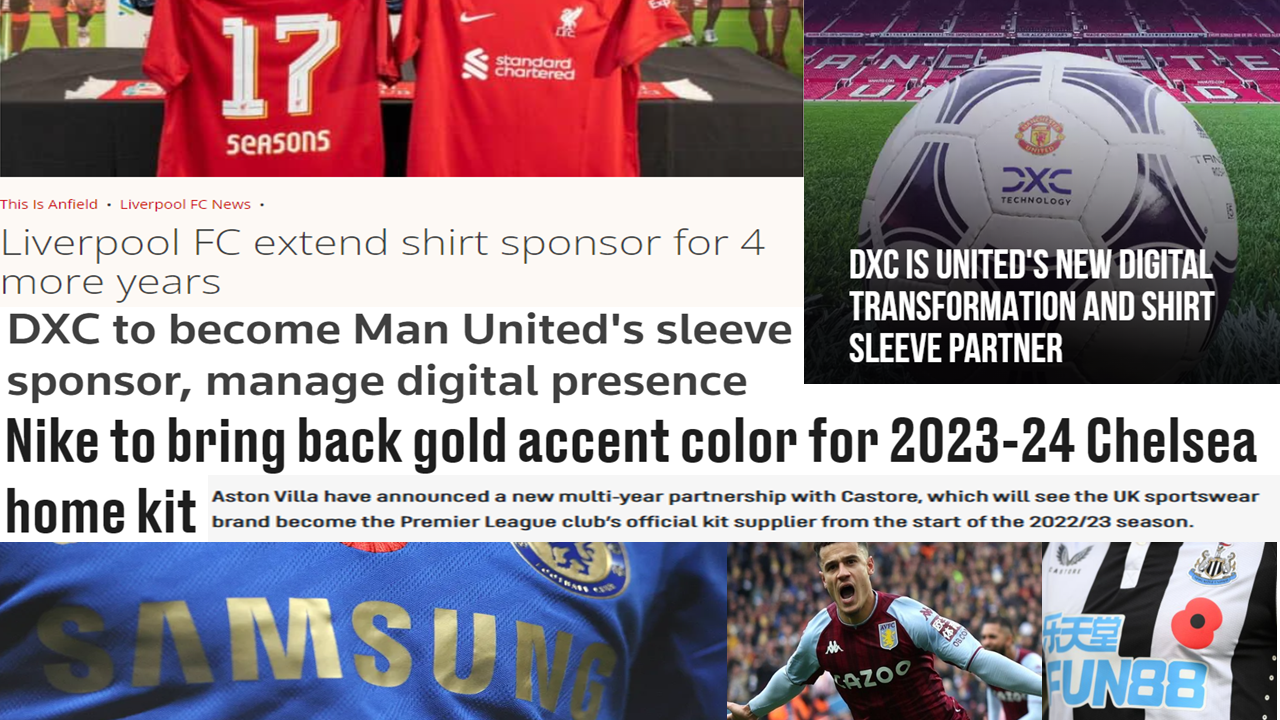

### 3 c. United States popularity of the term: Aston Villa vs Chelsea

In [36]:
%%bigquery
SELECT term, Round(avg(score),0) as score, Round(avg(rank),0) as rank, week, dma_name
FROM `bigquery-public-data.google_trends.top_terms`
where term LIKE '%Aston Villa vs Chelsea%' and score IS NOT NULL
group by week, term, dma_name
order by week, score desc;

Downloading: 100%|██████████| 2767/2767 [00:01<00:00, 1795.49rows/s]


term  score  rank        week  \
0     Aston Villa vs Chelsea  100.0   9.0  2017-10-22   
1     Aston Villa vs Chelsea   62.0   9.0  2017-10-22   
2     Aston Villa vs Chelsea   54.0   9.0  2017-10-22   
3     Aston Villa vs Chelsea   38.0   9.0  2017-10-22   
4     Aston Villa vs Chelsea   38.0   9.0  2017-10-22   
...                      ...    ...   ...         ...   
2762  Aston Villa vs Chelsea   47.0   9.0  2022-10-09   
2763  Aston Villa vs Chelsea   43.0   9.0  2022-10-09   
2764  Aston Villa vs Chelsea   38.0   9.0  2022-10-09   
2765  Aston Villa vs Chelsea   28.0   9.0  2022-10-09   
2766  Aston Villa vs Chelsea   27.0   9.0  2022-10-09   

                                  dma_name  
0                        Salt Lake City UT  
1                              Portland OR  
2     Harrisburg-Lancaster-Lebanon-York PA  
3                  Miami-Ft. Lauderdale FL  
4                  Hartford & New Haven CT  
...                                    ...  
2762                            Phoenix AZ  
2763                           Columbus OH  
2764    Norfolk-Portsmouth-Newport News VA  
2765               Albuquerque-Santa Fe NM  
2766                      Oklahoma City OK  

[2767 rows x 5 columns]

### 3 d. United States popularity of the term: Man United vs Newcastle

In [37]:
%%bigquery
SELECT term, Round(avg(score),0) as score, Round(avg(rank),0) as rank, week, dma_name
FROM `bigquery-public-data.google_trends.top_terms`
where term LIKE '%Man United vs Newcastle%' and score IS NOT NULL
group by week, term, dma_name
order by week, score desc;

Downloading: 100%|██████████| 4818/4818 [00:01<00:00, 3489.64rows/s]


term  score  rank        week  \
0     Man United vs Newcastle   70.0  11.0  2017-10-22   
1     Man United vs Newcastle   68.0  11.0  2017-10-22   
2     Man United vs Newcastle   42.0  11.0  2017-10-22   
3     Man United vs Newcastle   38.0  11.0  2017-10-22   
4     Man United vs Newcastle   37.0  11.0  2017-10-22   
...                       ...    ...   ...         ...   
4813  Man United vs Newcastle   29.0  11.0  2022-10-09   
4814  Man United vs Newcastle   24.0  11.0  2022-10-09   
4815  Man United vs Newcastle   23.0  11.0  2022-10-09   
4816  Man United vs Newcastle   22.0  11.0  2022-10-09   
4817  Man United vs Newcastle   21.0  11.0  2022-10-09   

                                      dma_name  
0                       Springfield-Holyoke MA  
1                    Providence-New Bedford MA  
2                         Fargo-Valley City ND  
3     Harlingen-Weslaco-Brownsville-McAllen TX  
4                        Wichita-Hutchinson KS  
...                                        ...  
4813                 Little Rock-Pine Bluff AR  
4814                              Rochester NY  
4815                                Madison WI  
4816                              Milwaukee WI  
4817                               Portland OR  

[4818 rows x 5 columns]

### 4. United States popularity of the three terms over time

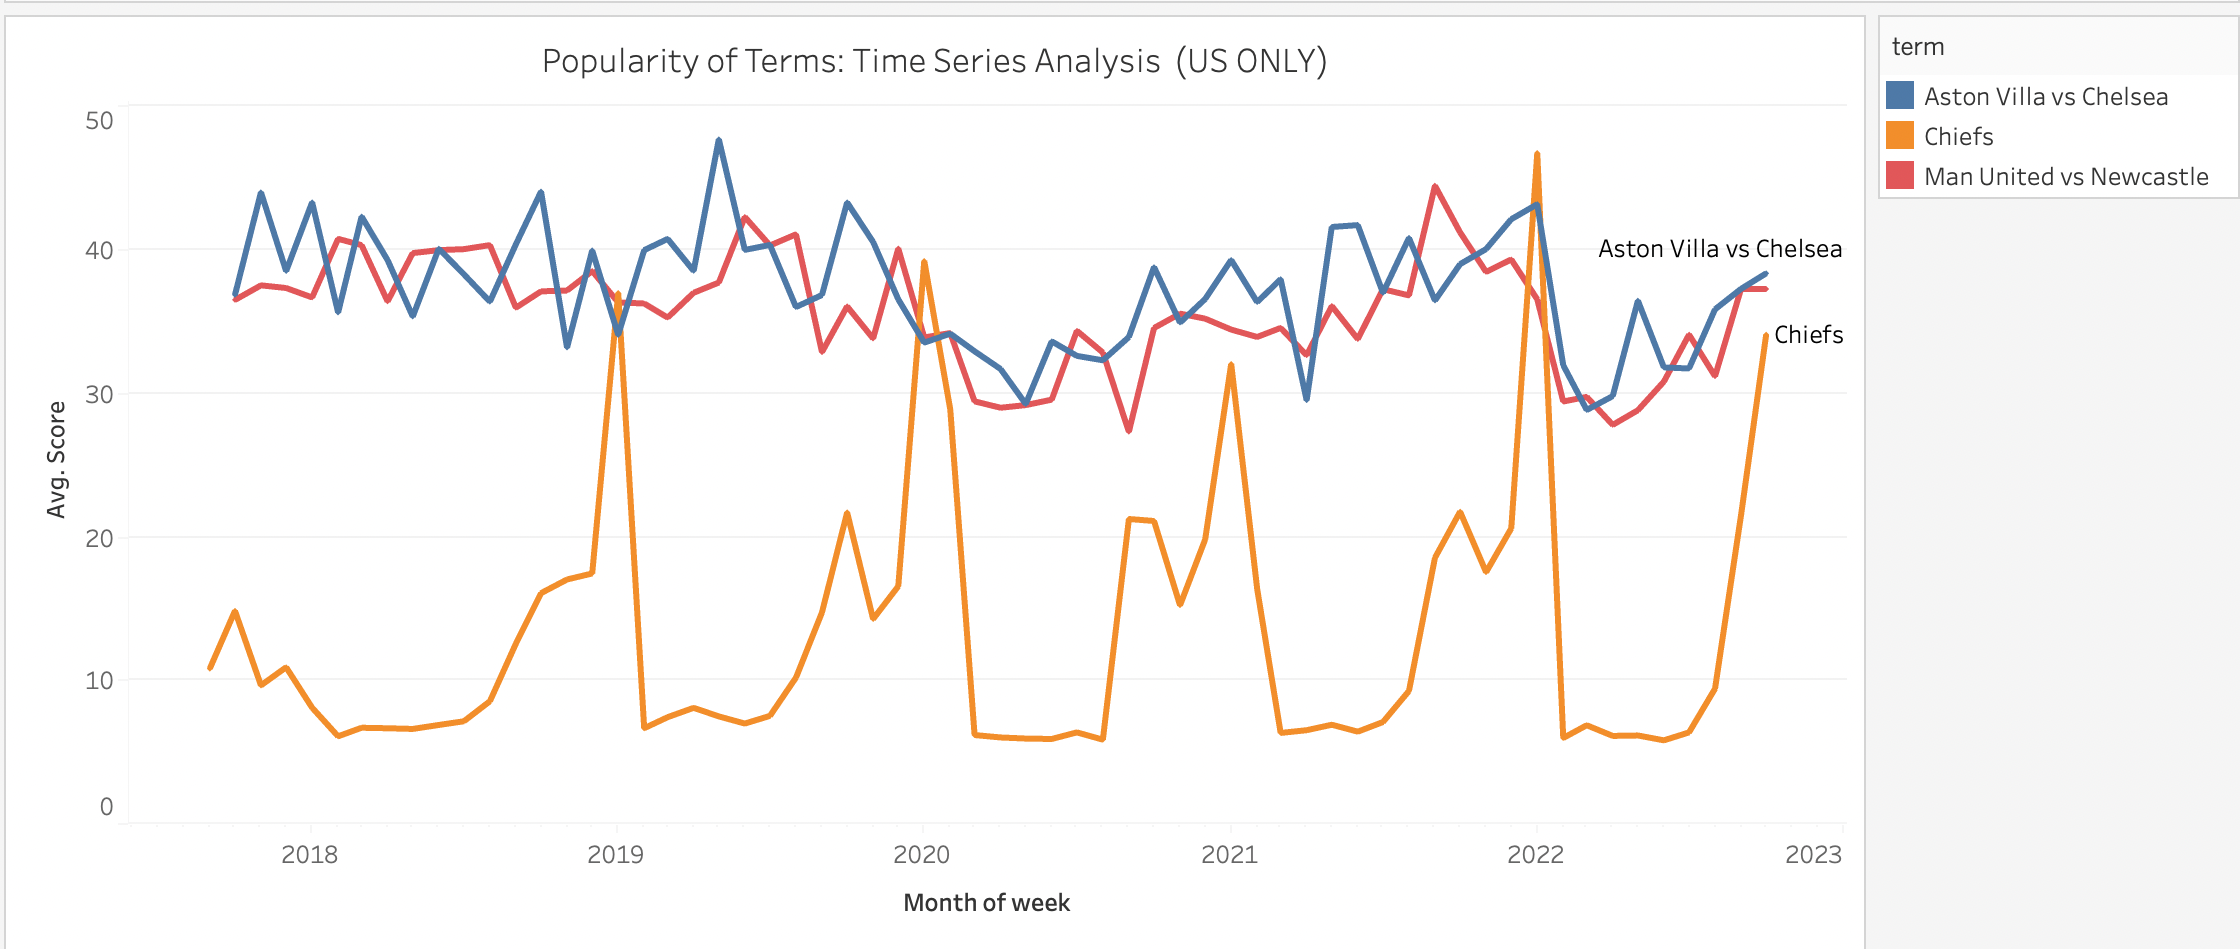

#### U.S.

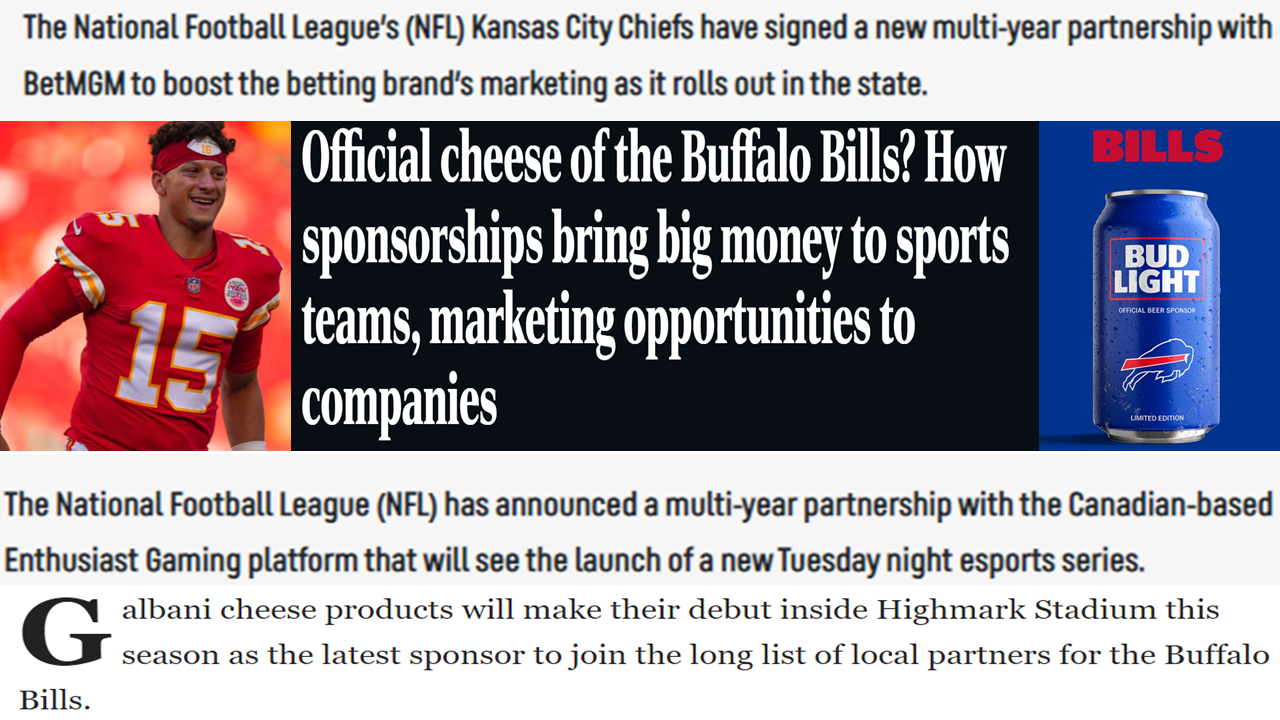

### 4 a. Popularity of the term 'Chiefs' across DMAs in the U.S. as it is the Rank-1 trending term in the U.S.

In [25]:
%%bigquery
SELECT term, Round(avg(score),0) as score, Round(avg(rank),0) as rank, week, dma_name
FROM `bigquery-public-data.google_trends.top_terms`
where term LIKE '%Chiefs%' and score IS NOT NULL
group by week, term, dma_name
order by week, score desc;

Downloading: 100%|██████████| 52224/52224 [00:00<00:00, 53104.10rows/s]


term  score  rank        week                     dma_name
0      Chiefs   48.0   1.0  2017-09-17                 Fairbanks AK
1      Chiefs   33.0   1.0  2017-09-17                    Eureka CA
2      Chiefs   26.0   1.0  2017-09-17  Wheeling WV-Steubenville OH
3      Chiefs   25.0   1.0  2017-09-17                Sioux City IA
4      Chiefs   24.0   1.0  2017-09-17                    Dothan AL
...       ...    ...   ...         ...                          ...
52219  Chiefs   17.0   1.0  2022-10-09                    Bangor ME
52220  Chiefs   16.0   1.0  2022-10-09           Charlottesville VA
52221  Chiefs   15.0   1.0  2022-10-09                   Jackson TN
52222  Chiefs   14.0   1.0  2022-10-09               Terre Haute IN
52223  Chiefs   13.0   1.0  2022-10-09                   Mankato MN

[52224 rows x 5 columns]

### 5. Conclusion

#### 
In Conclusion, from aiding support to marketers to plan ahead of seasonal trends, to finding a rapidly growing niche to allocate a marketing budget on, Google Trends can provide insights that can make marketing campaigns a success. Marketing specialists can find complementary verticals to expand a catalog and skyrocket blog traffic by updating popular SEO posts just in time for a peak season and catching the trends beforehand.
     
It’s clear from this case study that some brands apply some of the Google Trends comparative analysis to step ahead of their competitors. From the above example on the popularity of terms, we can see the precise plotting of five sports teams Aston Villa, Chelsea, Man U, Newcastle, and the Chiefs which were trending more than the others in terms of popularity on google search during a certain timeframe. This can also be used in various other industries by companies in retail, entertainment, and healthcare. Brands can certainly leverage over these metrics to strategize marketing campaigns around time-specific events to gain momentum over other competitor campaigns and create brand recall, at its best! 

### 6. Tableau Dashboard 
https://public.tableau.com/app/profile/syeda.ghazal.qadri/viz/B08-GoogleTrendsforSportsMarketing/B08?publish=yes 

Below is a reference of the dashboard keeping in mind the key trending term for football/soccer: 'Aston Villa vs Chelsea'


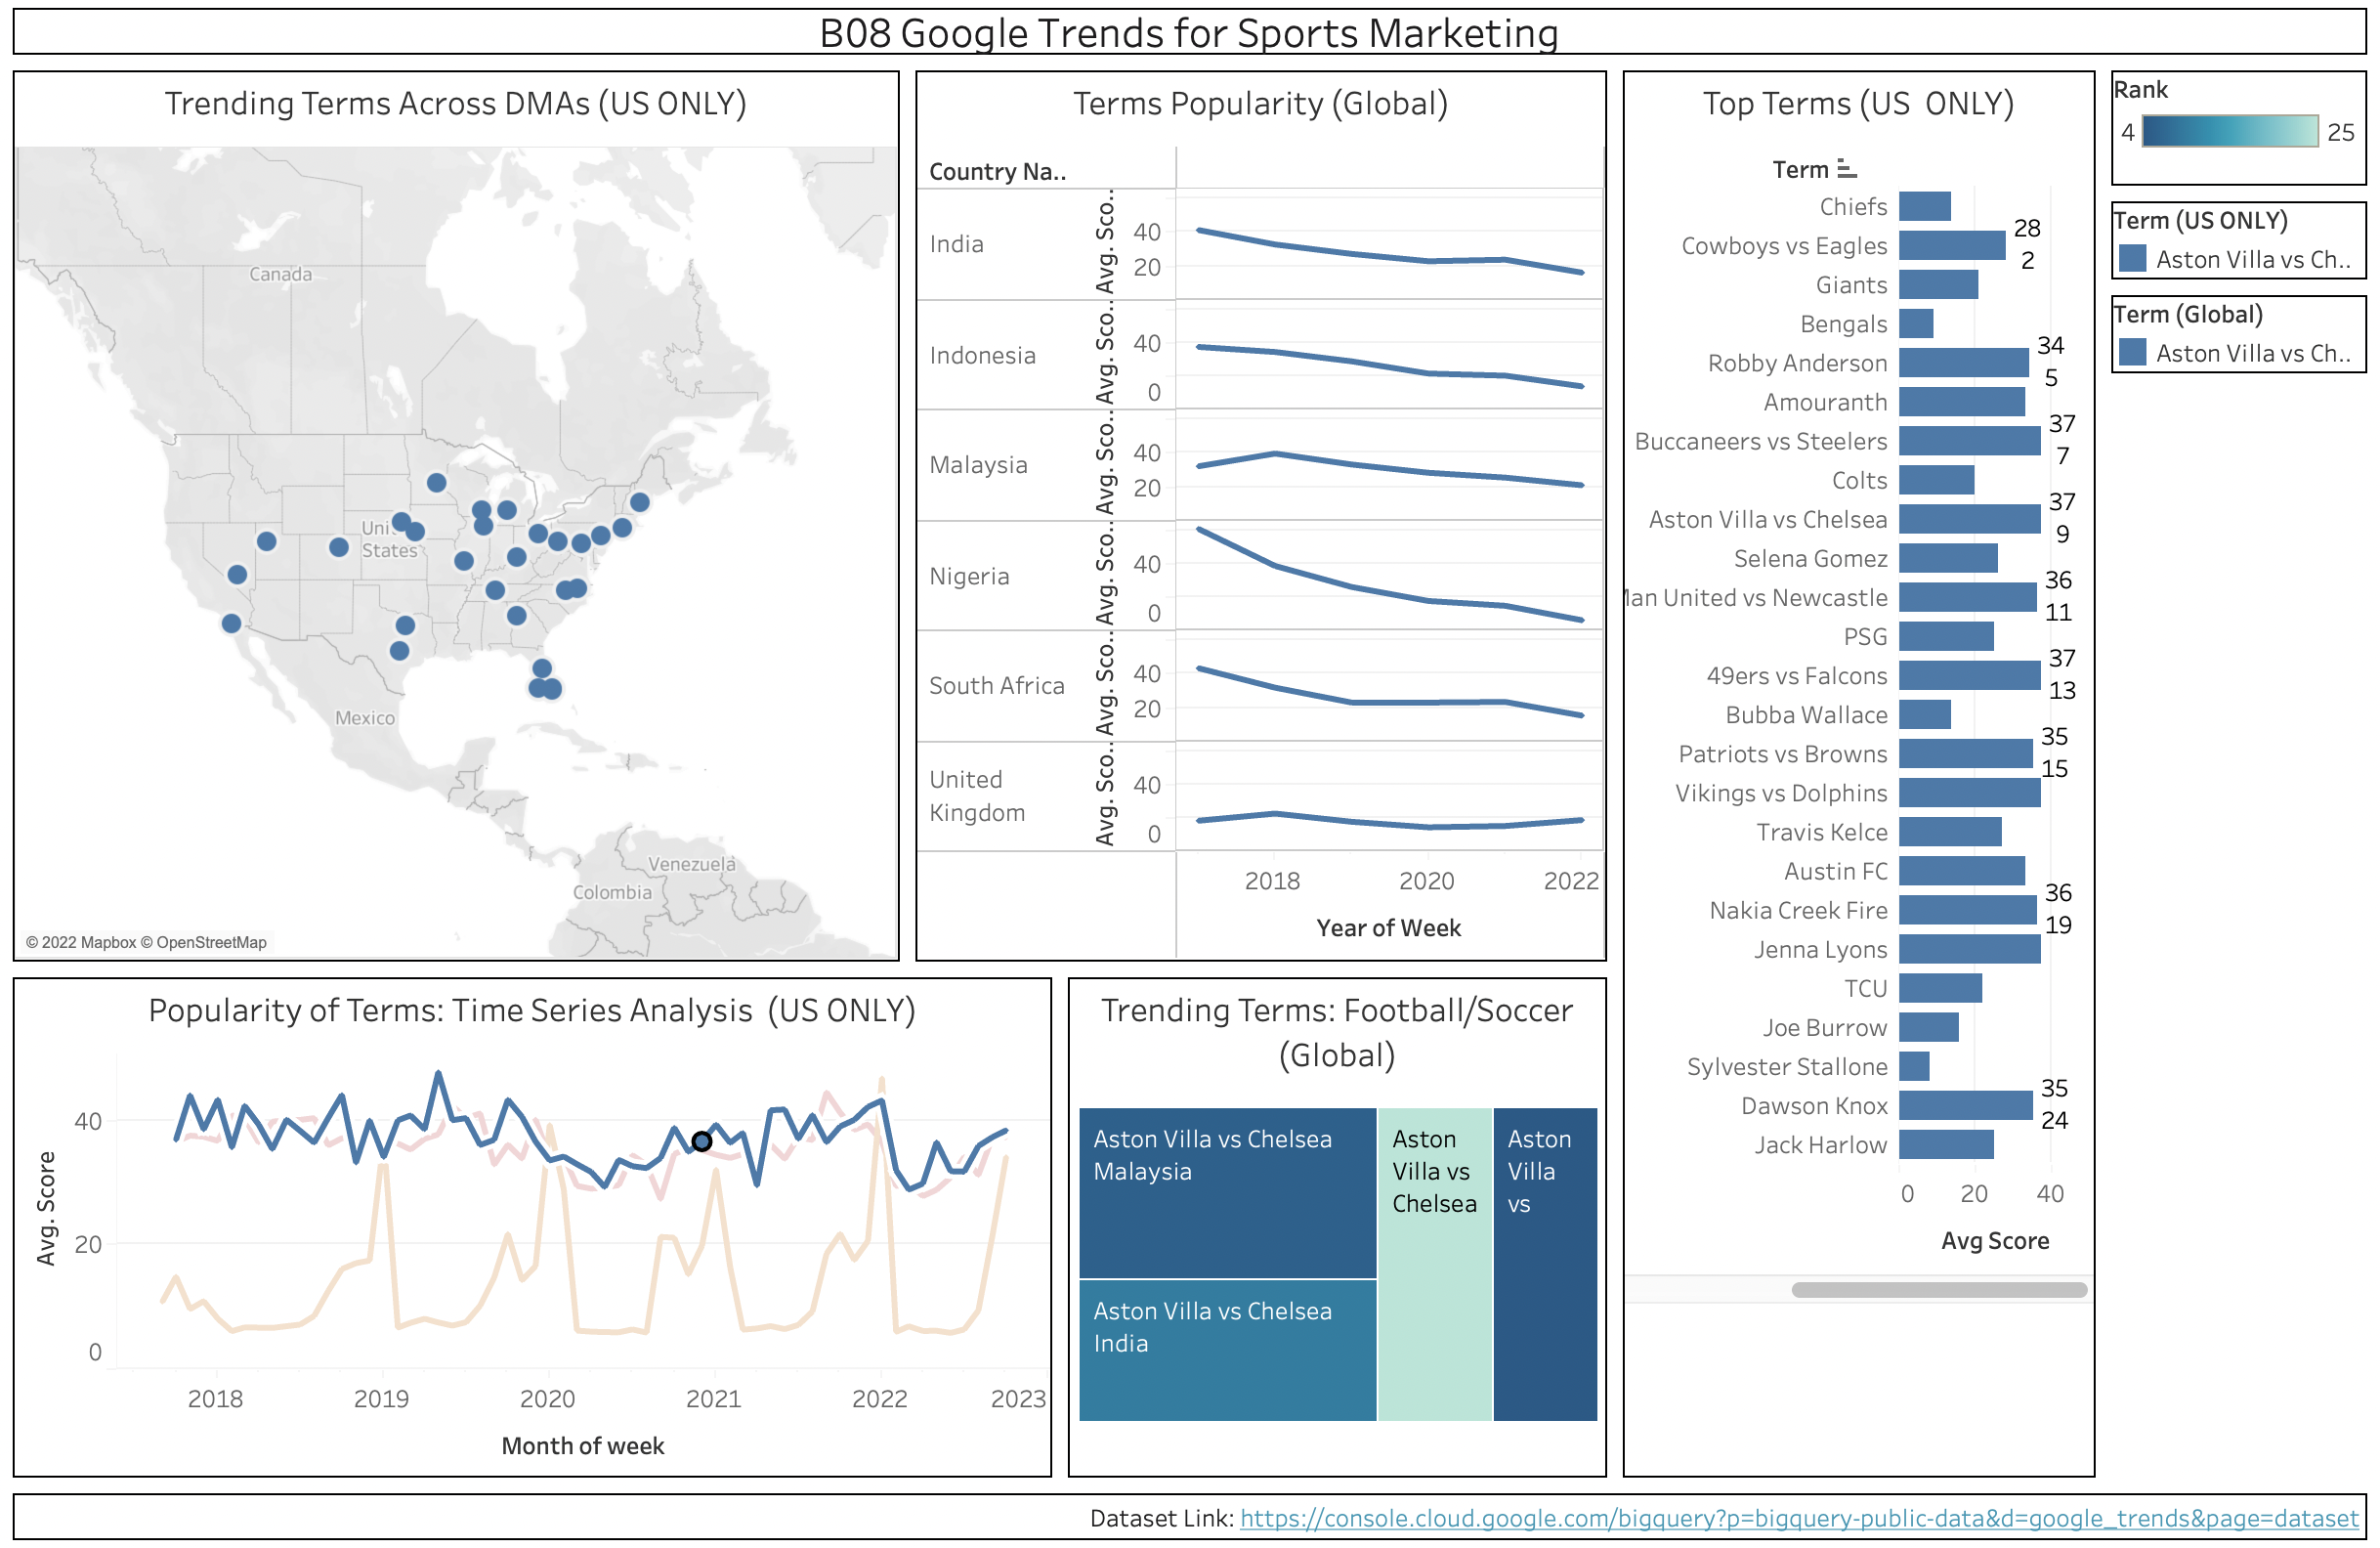

### 7. References

Data References:
https://towardsdatascience.com/tell-me-bigquery-what-is-trending-on-google-66a663807ffd
https://medium.com/google-news-lab/what-is-google-trends-data-and-what-does-it-mean-b48f07342ee8
https://datasignals.looker.com/embed/dashboards/11?theme=GoogleWhite
https://www.youtube.com/watch?v=ZjMluvco88o
https://www.sportspromedia.com/news/nfl-enthusiast-gaming-tuesday-night-series-2022/
https://trends.google.com/trends/explore?geo=US&q=Aston%20Villa%20vs%20Chelsea,Man%20United%20vs%20Newcastle,Chiefs
https://buffalonews.com/business/local/official-cheese-of-the-buffalo-bills-how-spon[…]s-marketing/article_7cfb914a-2ac9-11ed-a645-bba2a32c352d.html

Dataset Link:
https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=google_trends&page=dataset


